In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams["figure.figsize"] = (10,10)

sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading inputs

politifact = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/politifact.csv")
gossipcop = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/gossipcop.csv")
kaggle = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/kaggle_kdd_features.csv")
liar = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/liar_features.csv")
coaid = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/coaid_features.csv")
celebrity = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/celebrity.csv")
fakenews = pd.read_csv("/content/drive/MyDrive/hate-fake-online-asonam/fakenews.csv")

In [5]:
#updating kaggle labels
dict_replace = {"1": "fake", "0":"real"}
kaggle["label"] = kaggle["label"].map(dict_replace)

#updating liar labels
dict_replace = {0: "fake", 3:"real"}
liar["label"] = liar["label"].map(dict_replace)

#updating coaid labels
dict_replace = {"Fake": "fake", "Real":"real"}
coaid["label"] = coaid["label"].map(dict_replace)

In [6]:
features = ['toxicity', 'severe_toxicity', 'insult', 'profanity', 'threat', 'inflammatory', 'identity_attack']

def hists(df,feature_list):
  df = df[df["toxicity"] != -1]
  df_fake = df[df["label"]=="fake"]
  df_real = df[df["label"]=="real"]

  for f in feature_list:
    print("P-value (Kolmogorov-Smirnov)",stats.ks_2samp(df_fake[f].values, df_real[f].values)[1])
    df_fake[f].hist(alpha=0.5)
    df_real[f].hist(alpha=0.5)
    plt.title(f)
    plt.show()

P-value (Kolmogorov-Smirnov) 7.97543422951067e-48


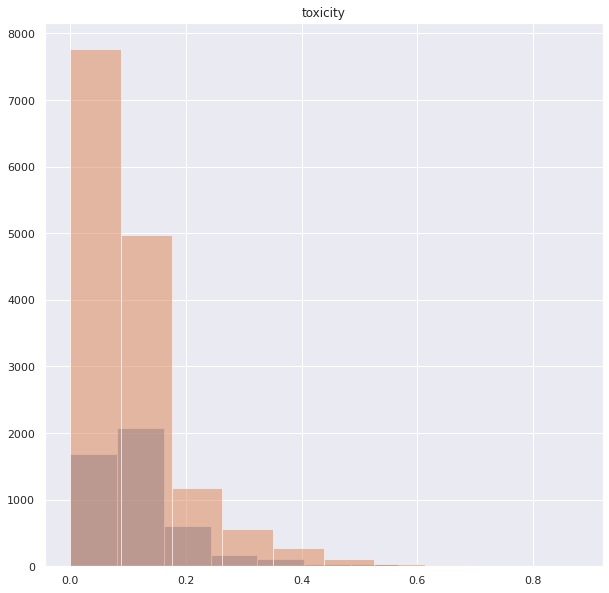

P-value (Kolmogorov-Smirnov) 5.72196147355304e-13


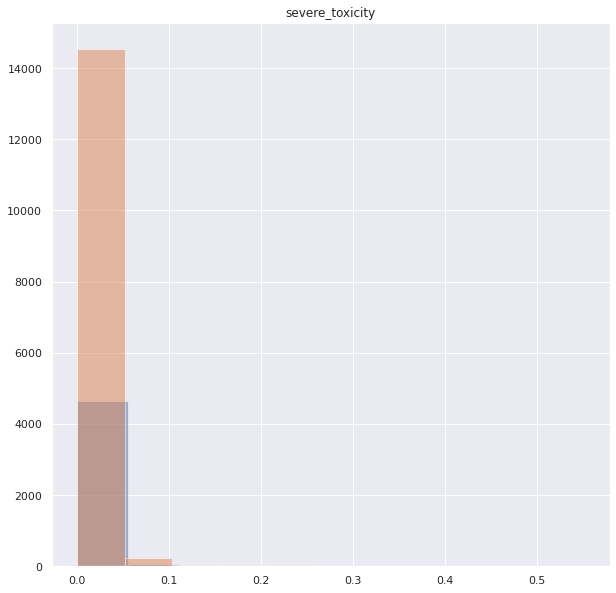

P-value (Kolmogorov-Smirnov) 6.361144276780351e-60


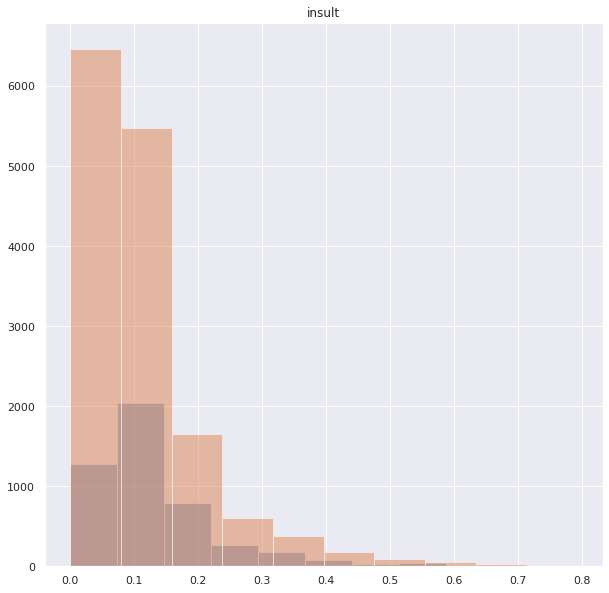

P-value (Kolmogorov-Smirnov) 1.1954793763900003e-14


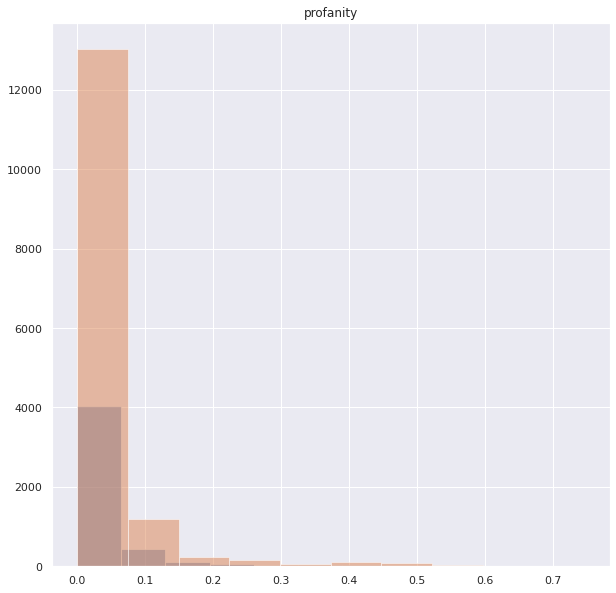

P-value (Kolmogorov-Smirnov) 1.1747389528365653e-19


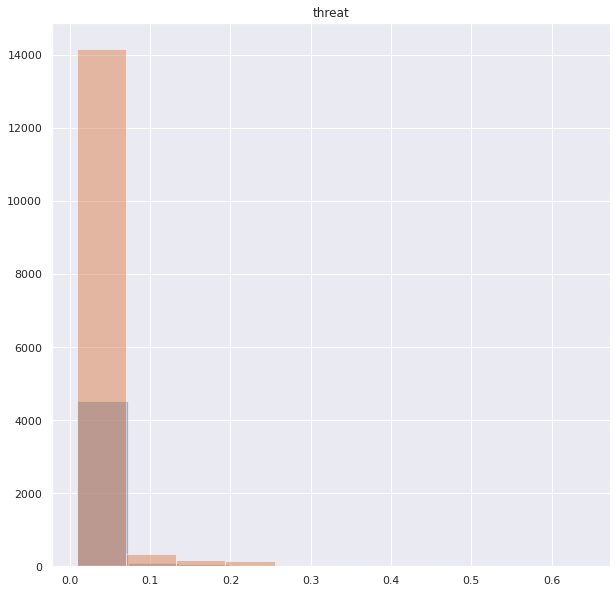

P-value (Kolmogorov-Smirnov) 1.377408024644571e-71


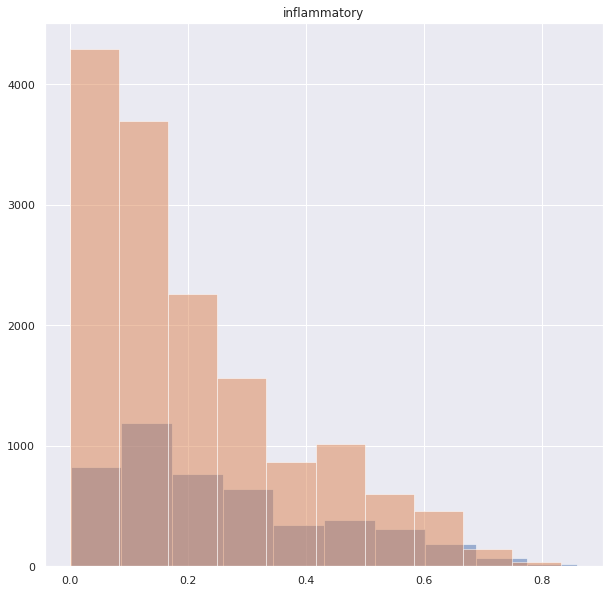

P-value (Kolmogorov-Smirnov) 9.477010643368167e-44


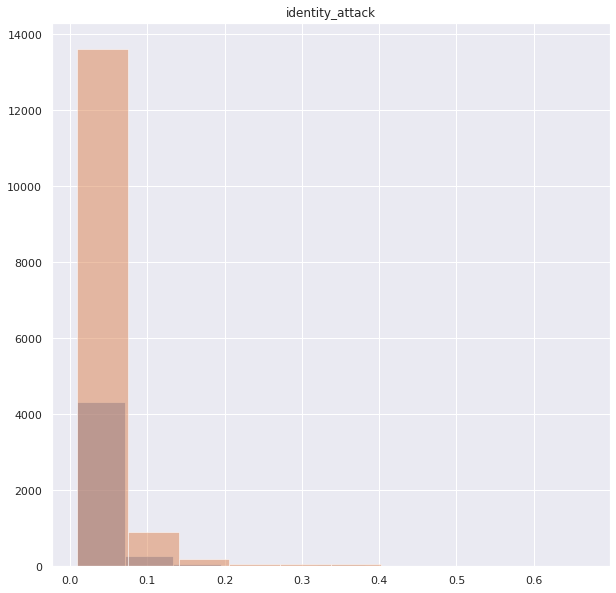

In [7]:
hists(gossipcop, features)

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


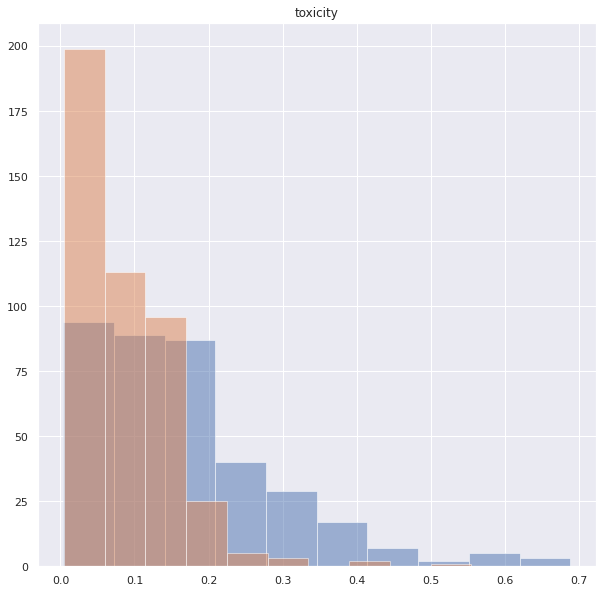

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


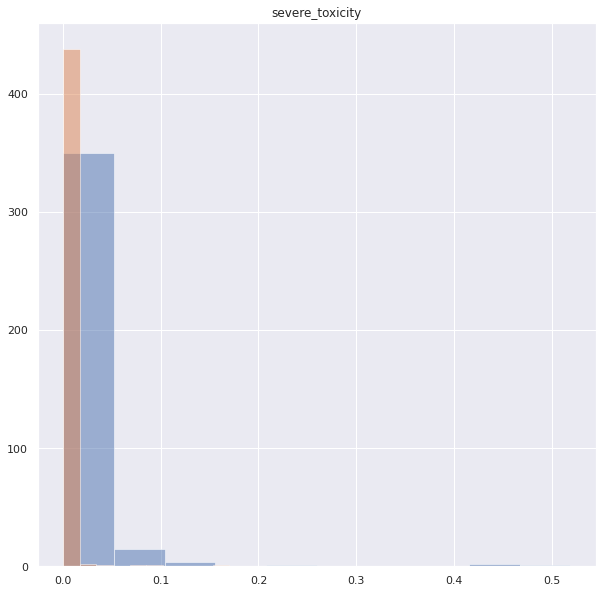

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


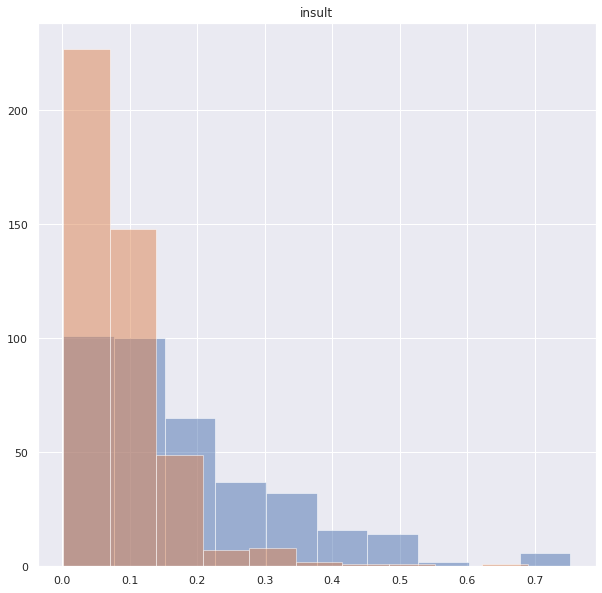

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


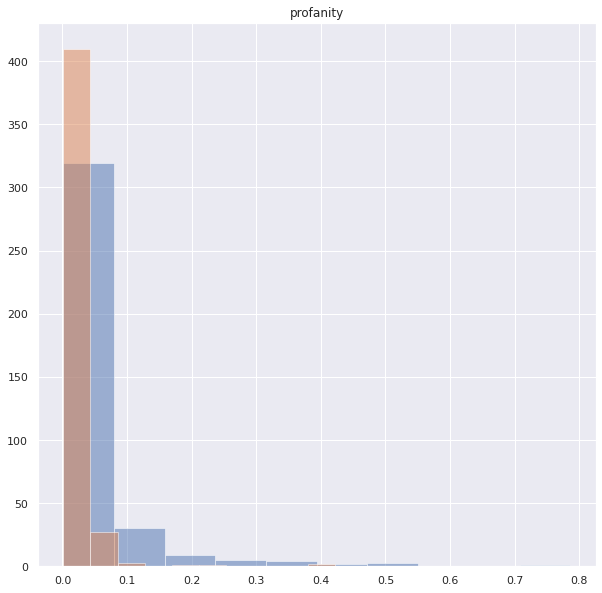

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


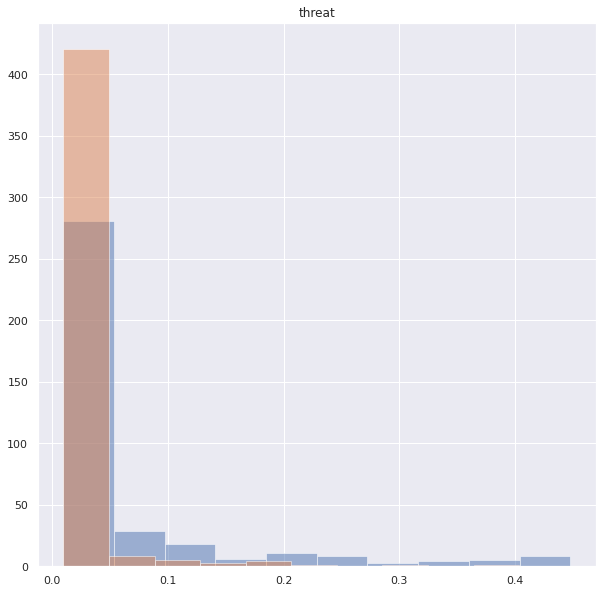

P-value (Kolmogorov-Smirnov) 4.440892098500626e-16


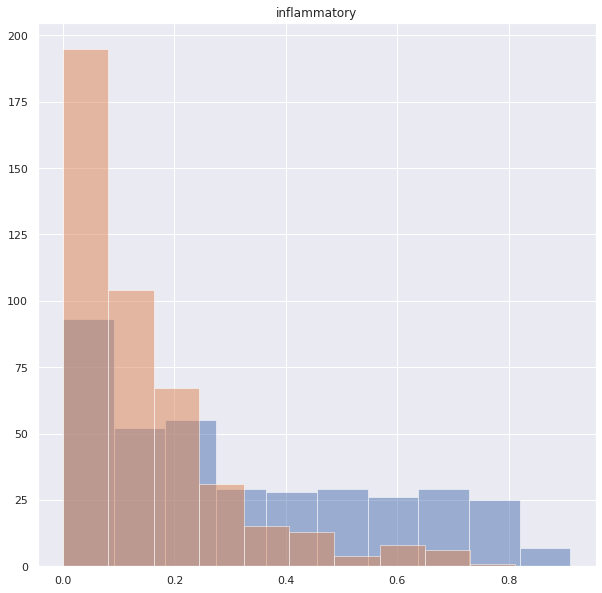

P-value (Kolmogorov-Smirnov) 2.4424906541753444e-15


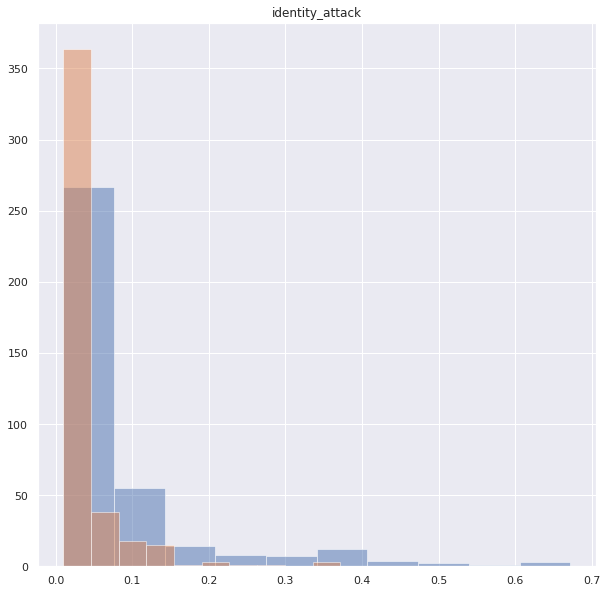

In [8]:
hists(politifact, features)

P-value (Kolmogorov-Smirnov) 0.983150793609936


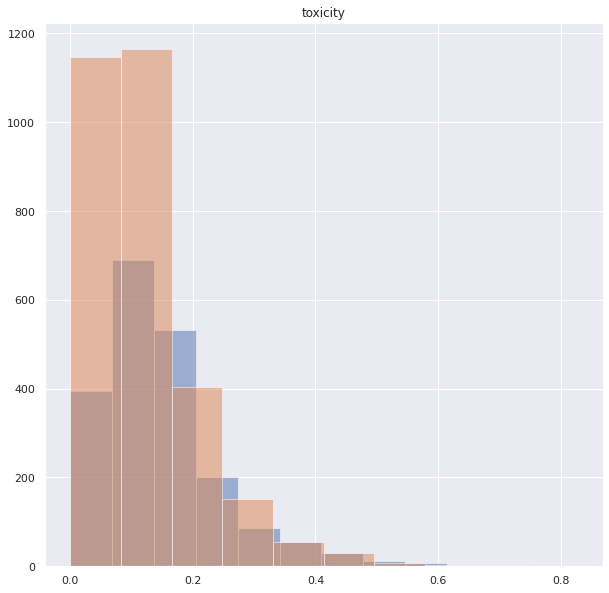

P-value (Kolmogorov-Smirnov) 0.9831507936101596


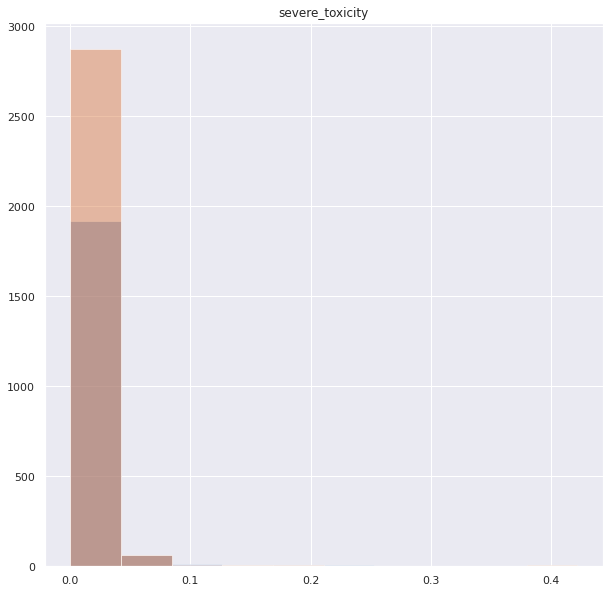

P-value (Kolmogorov-Smirnov) 0.983150793609936


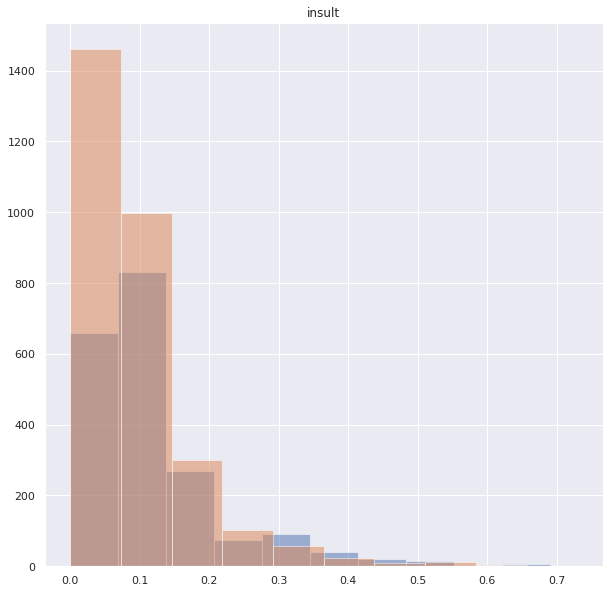

P-value (Kolmogorov-Smirnov) 0.9831586523205539


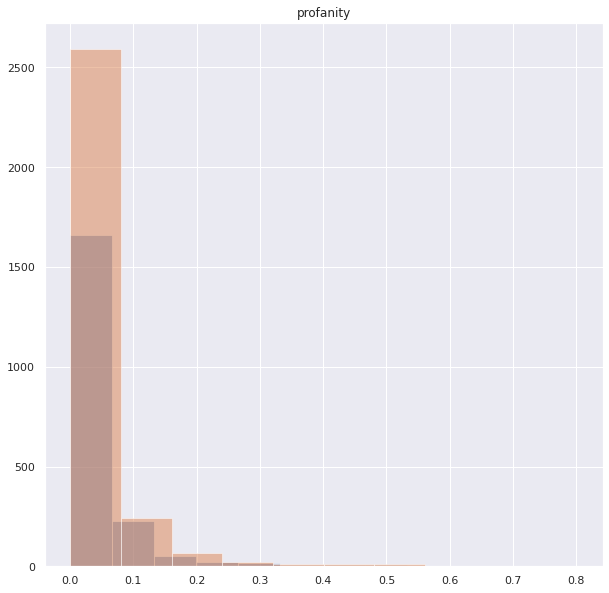

P-value (Kolmogorov-Smirnov) 0.9999999999996463


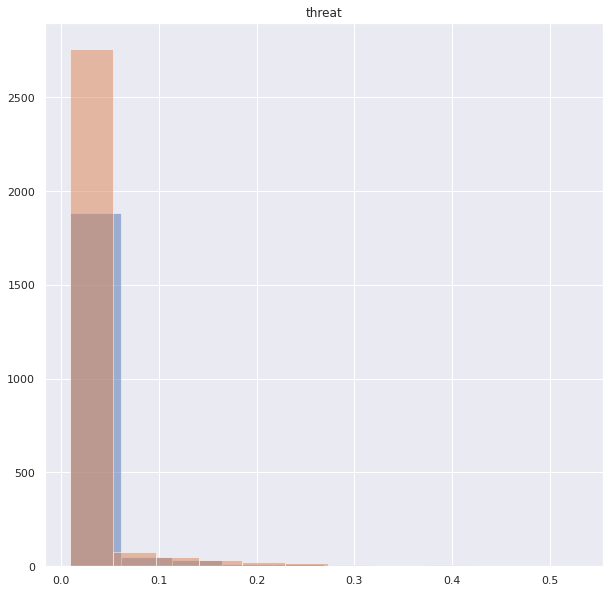

P-value (Kolmogorov-Smirnov) 0.983150793609936


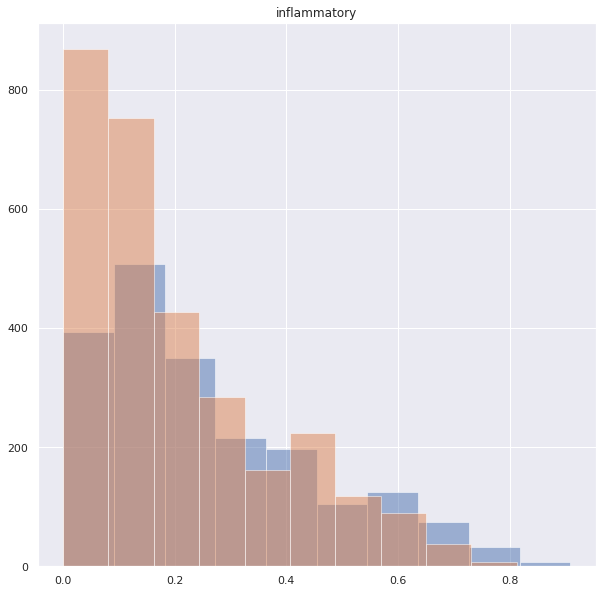

P-value (Kolmogorov-Smirnov) 0.9831507936148421


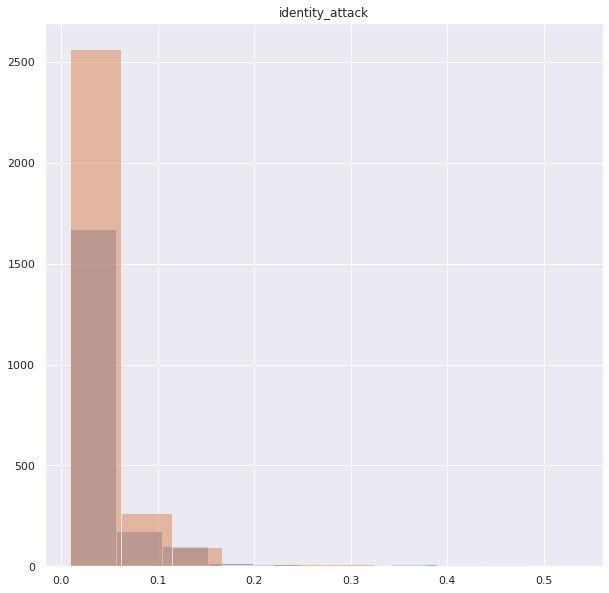

In [9]:
hists(kaggle, features)

P-value (Kolmogorov-Smirnov) 2.6645352591003757e-15


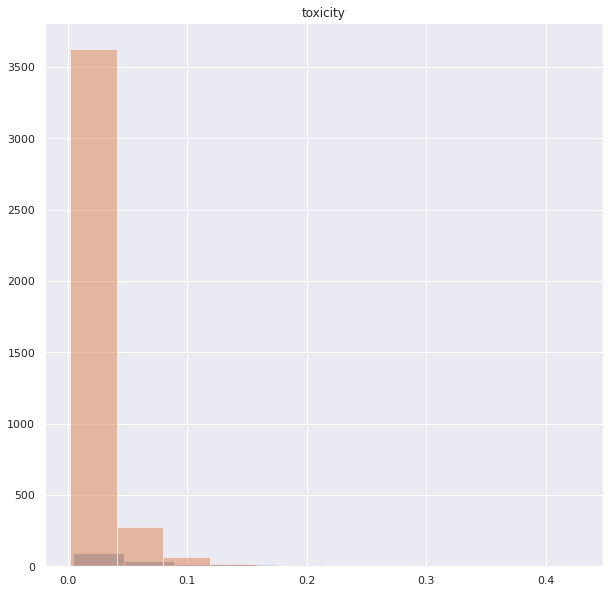

P-value (Kolmogorov-Smirnov) 2.6645352591003757e-15


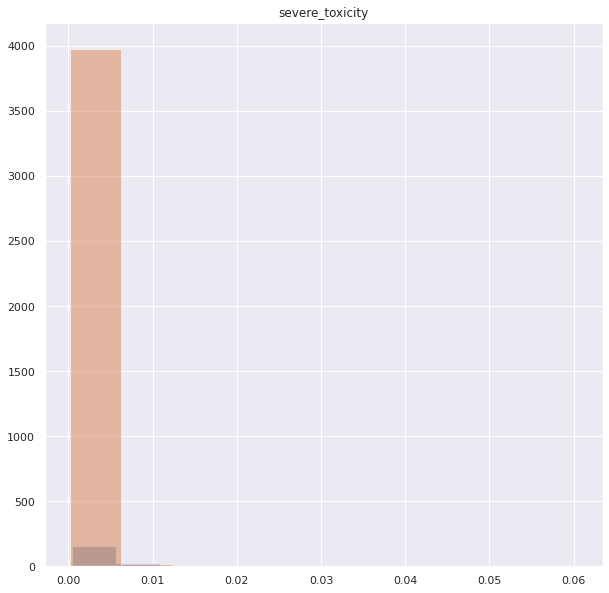

P-value (Kolmogorov-Smirnov) 2.6645352591003757e-15


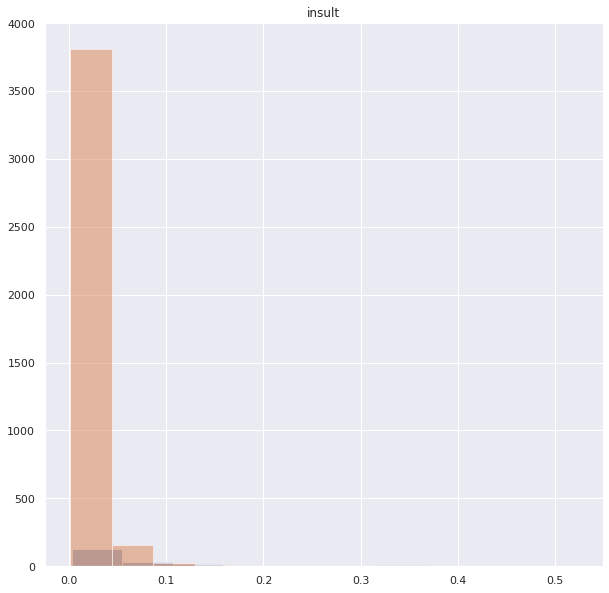

P-value (Kolmogorov-Smirnov) 1.319522759946068e-07


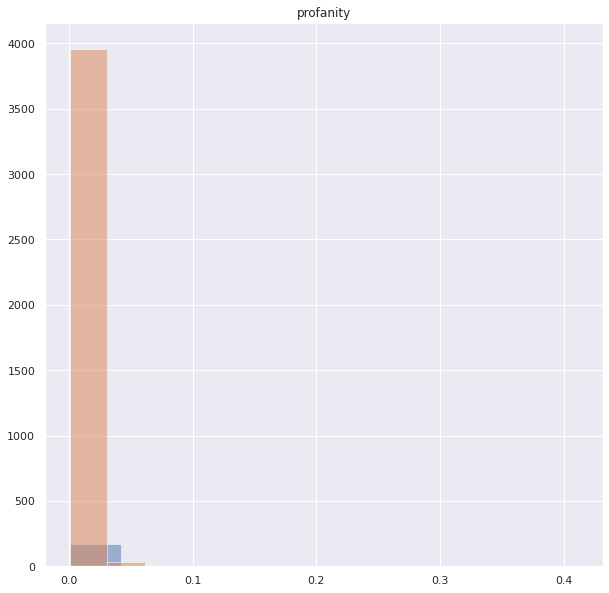

P-value (Kolmogorov-Smirnov) 1.2259425407057378e-06


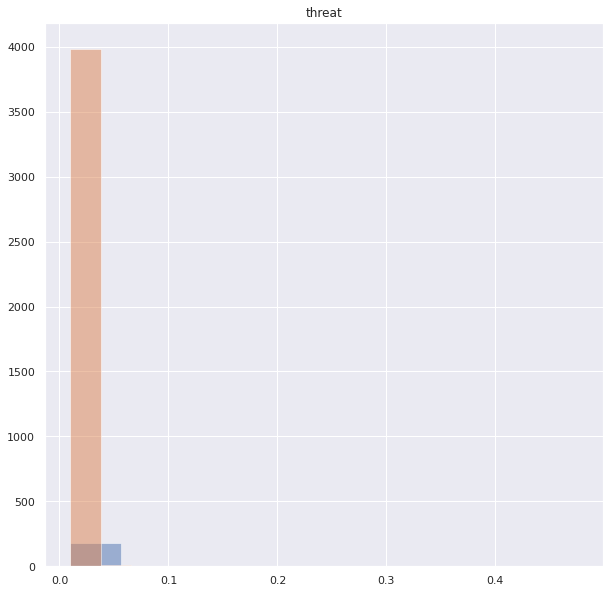

P-value (Kolmogorov-Smirnov) 2.6645352591003757e-15


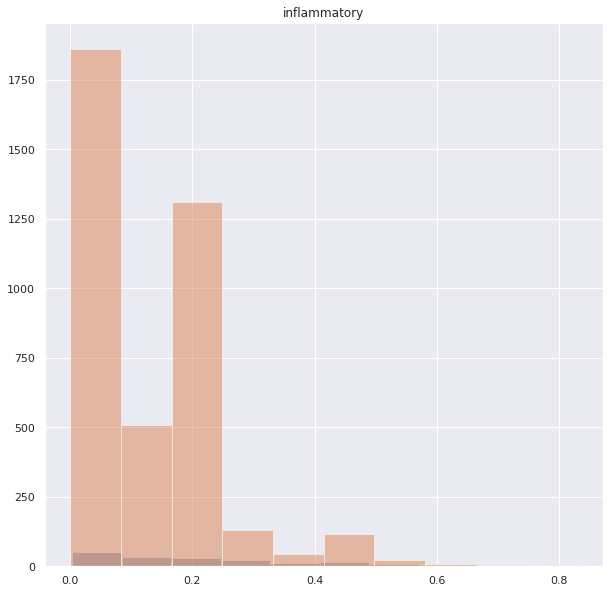

P-value (Kolmogorov-Smirnov) 2.6645352591003757e-15


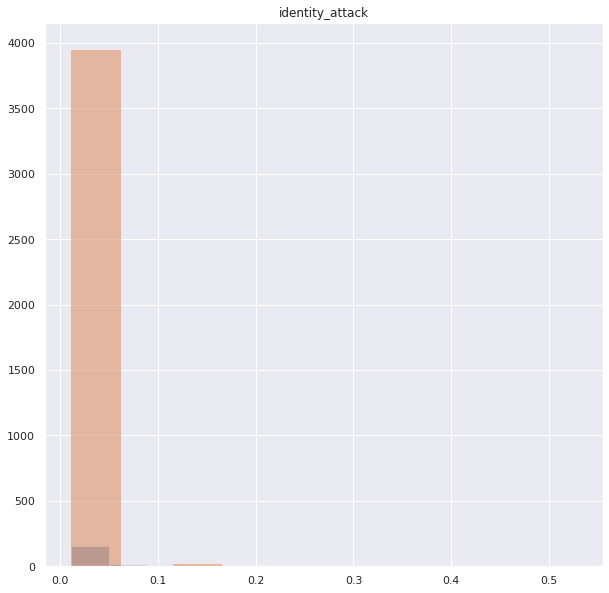

In [10]:
hists(coaid, features)

P-value (Kolmogorov-Smirnov) 0.035616246889062175


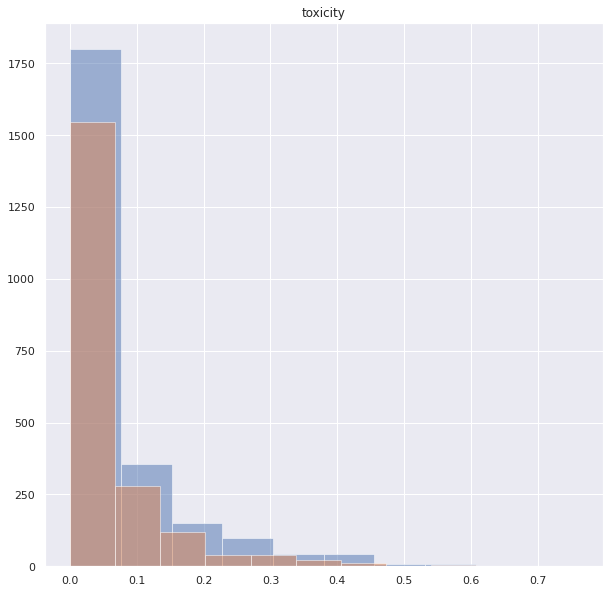

P-value (Kolmogorov-Smirnov) 0.03618618405198237


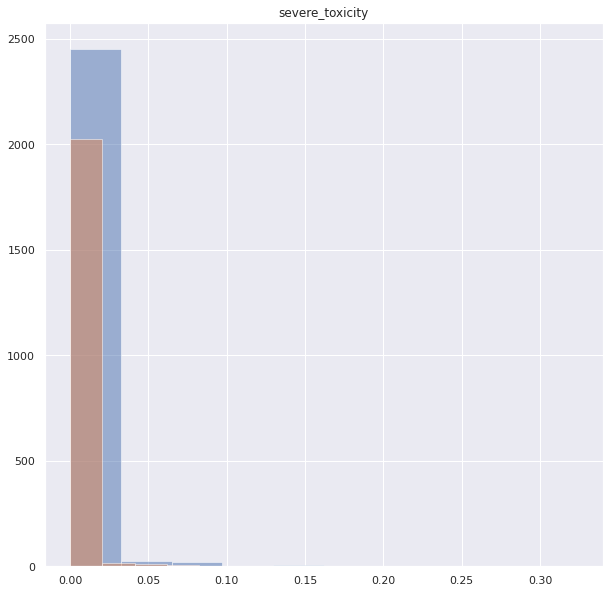

P-value (Kolmogorov-Smirnov) 0.03561487671267327


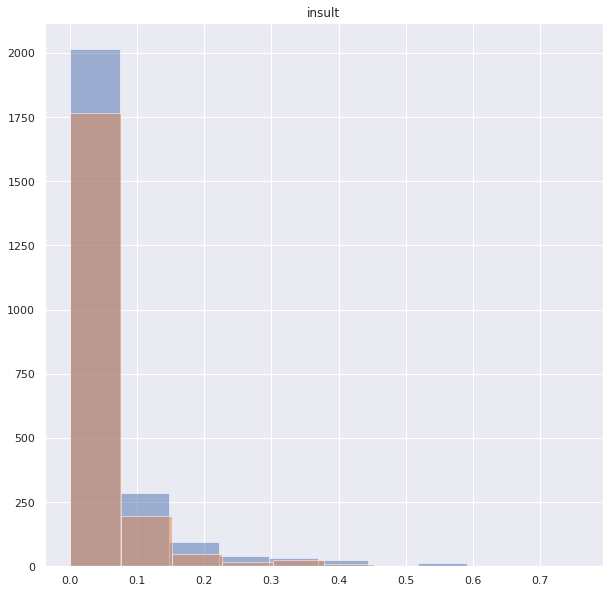

P-value (Kolmogorov-Smirnov) 0.03618500688899662


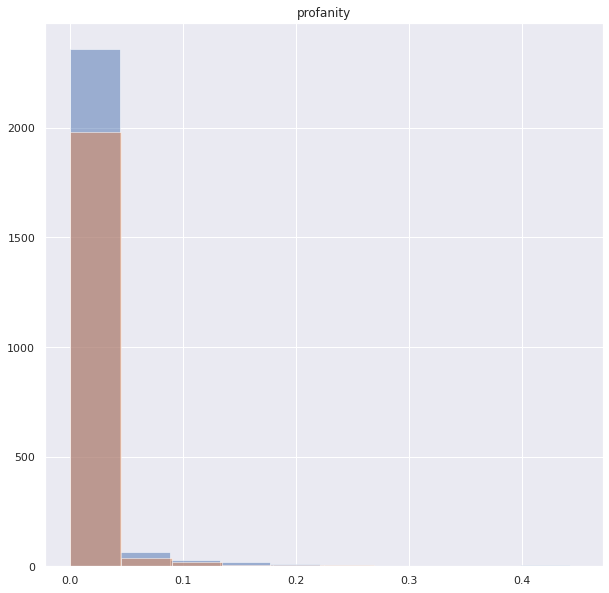

P-value (Kolmogorov-Smirnov) 0.03794862754872119


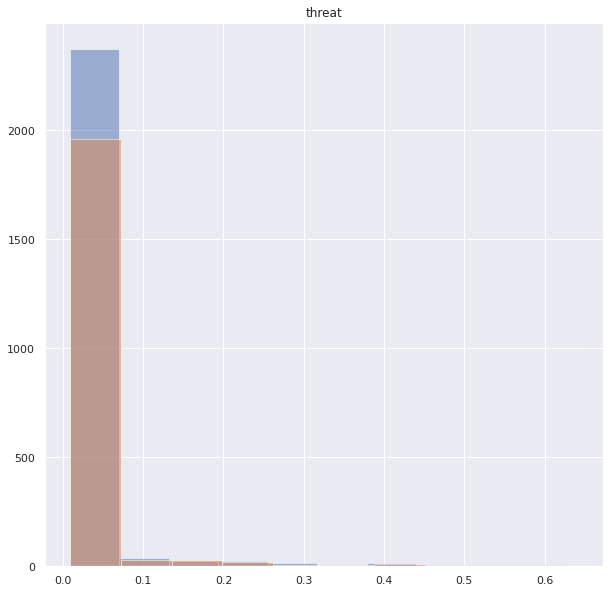

P-value (Kolmogorov-Smirnov) 0.06190680970807305


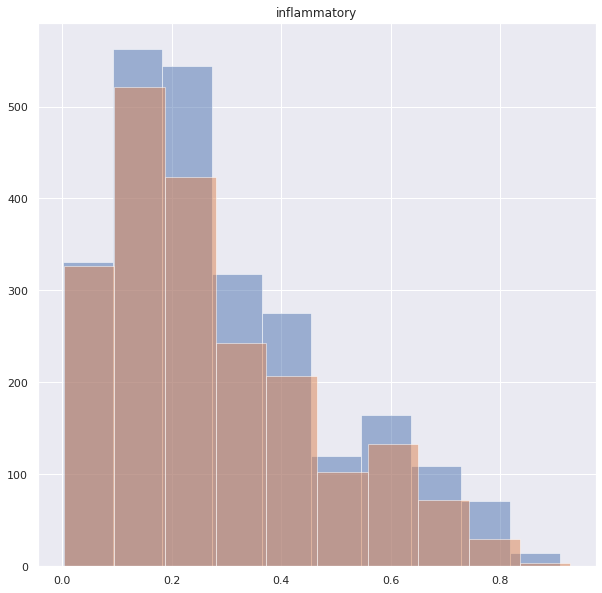

P-value (Kolmogorov-Smirnov) 0.06456070525974611


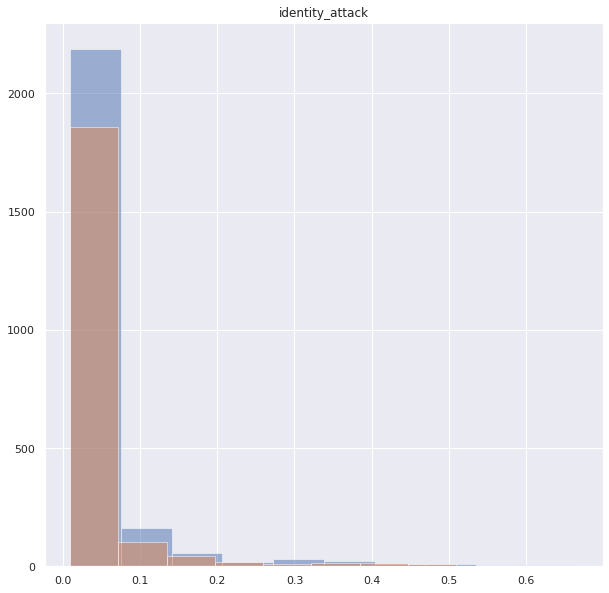

In [11]:
hists(liar, features)

## Dataset class proportion

In [21]:
def class_proportion(df,remove_errors=True):
  if(remove_errors):
    df = df[df["toxicity"] != -1]

  size = len(df)
  sum = len(df[df["label"]=="fake"]) + len(df[df["label"]=="real"])
  print(len(df[df["label"]=="fake"]),",",len(df[df["label"]=="real"]),",",sum)

print("fake,real,total")
class_proportion(gossipcop)
class_proportion(politifact)
class_proportion(kaggle)
class_proportion(liar)
class_proportion(coaid)
class_proportion(celebrity)
class_proportion(fakenews)

fake,real,total
4739 , 14926 , 19665
373 , 444 , 817
2008 , 2970 , 4978
2511 , 2063 , 4574
191 , 4006 , 4197
250 , 249 , 499
240 , 240 , 480


## Size of News Text

In [13]:
def token_counter(string):
    return len(string.split())


def return_length_texts(df):
  df = df.dropna(subset=["text"])
  print("Non-Null news:", len(df))
  df_real = df[df["label"]=="real"]
  df_fake = df[df["label"]=="fake"]

  lengths_real = []
  lengths_fake = []

  for index,row in df_real.iterrows():
      lengths_real.append(token_counter(row["text"]))
  for index,row in df_fake.iterrows():
      lengths_fake.append(token_counter(row["text"]))

  return lengths_real, lengths_fake


def plot_distribution(data, labels, title="", outliers=False):
  g = sns.boxplot(data=data, showfliers = outliers).set_xticklabels(labels)
  plt.title(title, fontsize=18)
  plt.show()
  

Non-Null news: 819


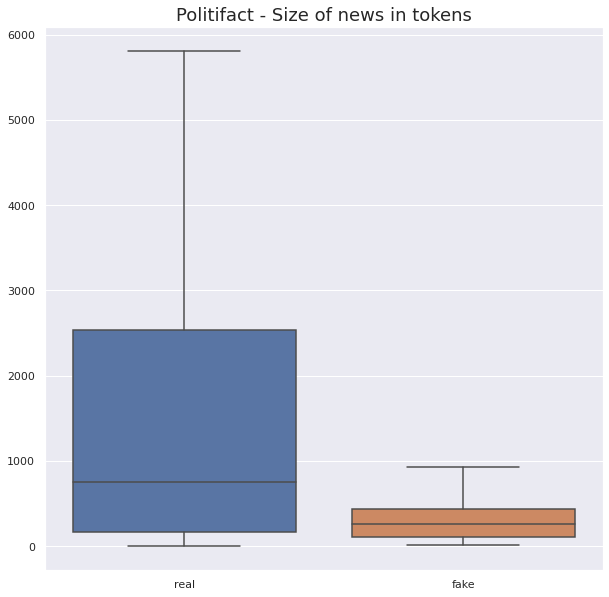

In [14]:
real,fake = return_length_texts(politifact)
labels = ["real","fake"]
plot_distribution([real,fake],labels,"Politifact - Size of news in tokens")


Non-Null news: 19711


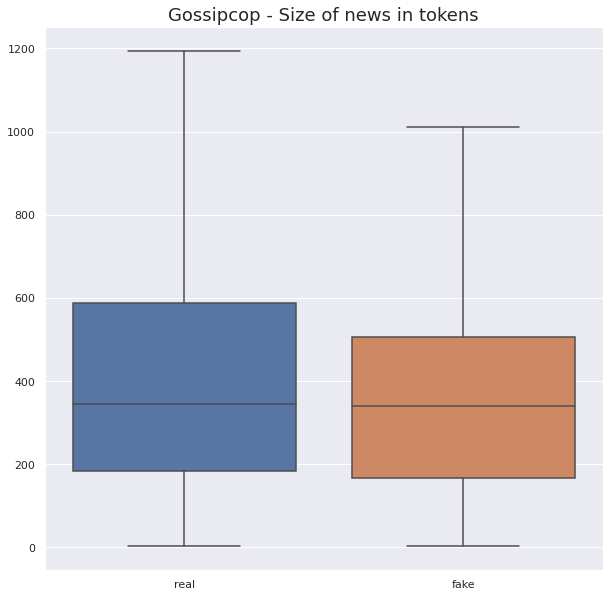

In [15]:
real,fake = return_length_texts(gossipcop)
labels = ["real","fake"]
plot_distribution([real,fake],labels,"Gossipcop - Size of news in tokens")


Non-Null news: 12836


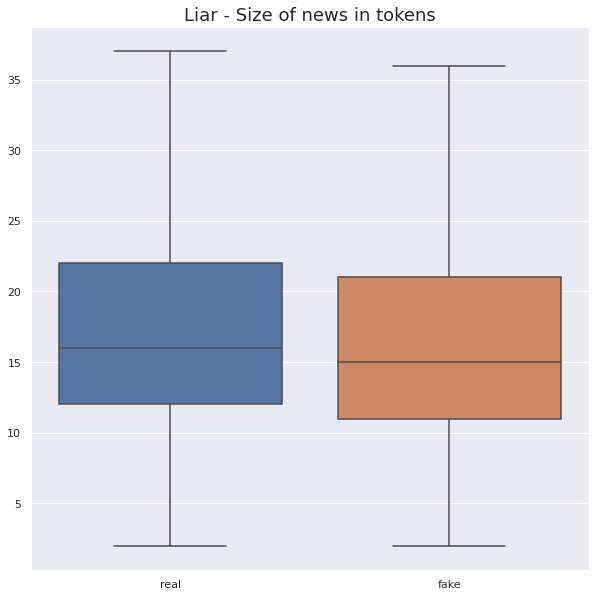

In [16]:
real,fake = return_length_texts(liar)
labels = ["real","fake"]
plot_distribution([real,fake],labels,"Liar - Size of news in tokens")

Non-Null news: 4987


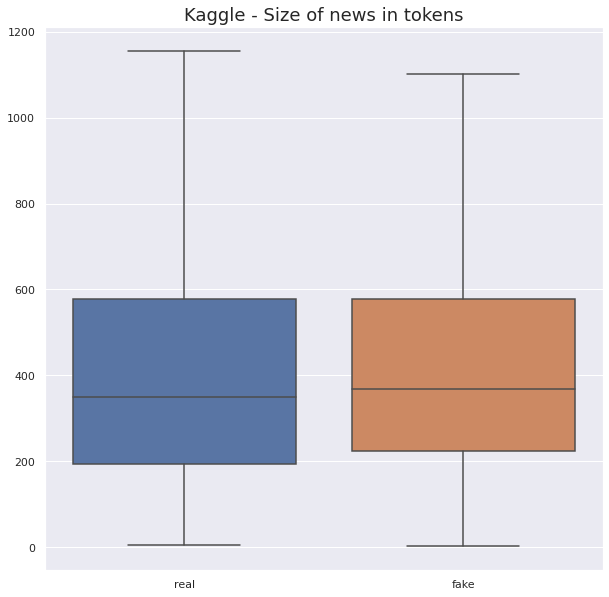

In [17]:
real,fake = return_length_texts(kaggle)
labels = ["real","fake"]
plot_distribution([real,fake],labels,"Kaggle - Size of news in tokens")

Non-Null news: 4197


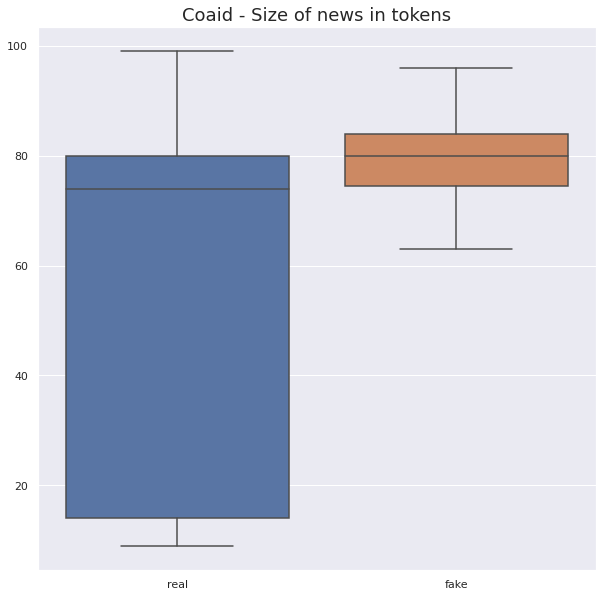

In [18]:
real,fake = return_length_texts(coaid)
labels = ["real","fake"]
plot_distribution([real,fake],labels,"Coaid - Size of news in tokens")

## News Categories per Dataset

In [19]:
politifact.columns

Index(['url', 'text', 'images', 'top_img', 'keywords', 'authors',
       'canonical_link', 'title', 'meta_data', 'movies', 'publish_date',
       'source', 'summary', 'label', 'dataset', 'toxicity', 'severe_toxicity',
       'insult', 'profanity', 'threat', 'inflammatory', 'identity_attack'],
      dtype='object')

## separar por enquanto

In [20]:
gossipcop['publish_date'] = pd.to_datetime(gossipcop['publish_date'])
gossipcop["publish_year"] = pd.DatetimeIndex(gossipcop['publish_date']).year
gossipcop["publish_year"]
data = gossipcop[["label","toxicity","publish_year"]]
data = data.sort_values("publish_year")
data = data[data["toxicity"]>=0]
data = data.dropna()
data = data[data["publish_year"]>=2000]
aux = data.pivot_table(index=['publish_year'],columns='label',aggfunc='size')
aux["fake"] = aux["fake"]/aux["fake"].sum()
aux["real"] = aux["real"]/aux["real"].sum()
aux.plot(kind="bar")

KeyError: ignored

In [ ]:
import datetime

def convert_time(x):
  try:
    return datetime.datetime.fromisoformat(x).year
  except:
    return -1

# tem uns errinhos nesse cast do ano, mas olhei manualmente e a maioria esta em 2020 msm (o que faz sentido pq eh covid)
coaid["publish_year"] = coaid["publish_date"].apply(lambda x: convert_time(x))
data = coaid[["label","toxicity","publish_year"]]
data = data.sort_values("publish_year")
data = data[data["toxicity"]>=0]
data = data.dropna()
data = data[data["publish_year"]>=2000]
aux = data.pivot_table(index=['publish_year'],columns='label',aggfunc='size')
aux["fake"] = aux["fake"]/aux["fake"].sum()
aux["real"] = aux["real"]/aux["real"].sum()
aux.plot(kind="bar")